## Annually Return

Calculate annual return based on other timeframe rates

In [2]:
def annual_return(rate,periods):
  aux = (rate + 1)**periods - 1
  return aux * 100

#example
daily_return = 0.0003
periods = 365
print("Security Return: {}%".format(annual_return(daily_return,periods)))

Security Return: 11.570174904772411%


## Daily Simple Rate of Returns / Daily Simple Returns

$Simple\;Rate\; of\; Return = \frac{P_t - P_0}{P_0}$

It is preferable to use simple returns when we calculare the returns of multiple securities.

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [4]:
import numpy as  np
import pandas_datareader.data as wb
import matplotlib.pyplot as plt

In [5]:
'''
returns the historical price data of a company, including the percentage daily 
change, daily simple return
'''
def simple_return(ticket,data_source,start_year):
  info = wb.DataReader(ticket,data_source,start = start_year)
  info['simple_return'] = (info['Adj Close'] / info['Adj Close'].shift(1))-1
  return info

In [6]:
AMZN = simple_return('AMZN','yahoo','2010')

In [7]:
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close,simple_return
count,3134.000000,3134.000000,3134.000000,3134.000000,3.134000e+03,3134.000000,3133.000000
mean,57.205789,55.890815,56.587449,56.557612,8.914266e+07,56.557612,0.001079
std,54.605184,53.285811,53.989015,53.932315,5.377968e+07,53.932315,0.020326
min,5.564500,5.290000,5.296500,5.430500,1.614402e+07,5.430500,-0.140494
25%,13.188875,12.896250,13.066250,13.044625,5.633450e+07,13.044625,-0.008714
50%,33.469250,32.849501,33.178251,33.148500,7.530100e+07,33.148500,0.000974
75%,90.921999,89.212627,90.050375,90.037750,1.050725e+08,90.037750,0.011472
max,188.654007,184.839493,187.199997,186.570496,8.484220e+08,186.570496,0.157457


In [8]:
AMZN.tail(10)

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
2022-06-01,125.179001,120.622498,122.255997,121.683998,127528000.0,121.683998,0.012266
2022-06-02,125.610001,120.044998,121.683998,125.511002,100560000.0,125.511002,0.031450
2022-06-03,124.400002,121.046501,124.199997,122.349998,97604000.0,122.349998,-0.025185
2022-06-06,128.990005,123.809998,125.250000,124.790001,135269000.0,124.790001,0.019943
2022-06-07,124.099998,120.629997,122.010002,123.000000,85156700.0,123.000000,-0.014344
2022-06-08,123.750000,120.750000,122.610001,121.180000,64926600.0,121.180000,-0.014797
2022-06-09,121.300003,116.099998,119.989998,116.150002,67029800.0,116.150002,-0.041508
2022-06-10,114.500000,109.050003,113.419998,109.650002,87266000.0,109.650002,-0.055962
2022-06-13,106.540001,101.860001,104.190002,103.669998,99135200.0,103.669998,-0.054537


### 00. Price Plot

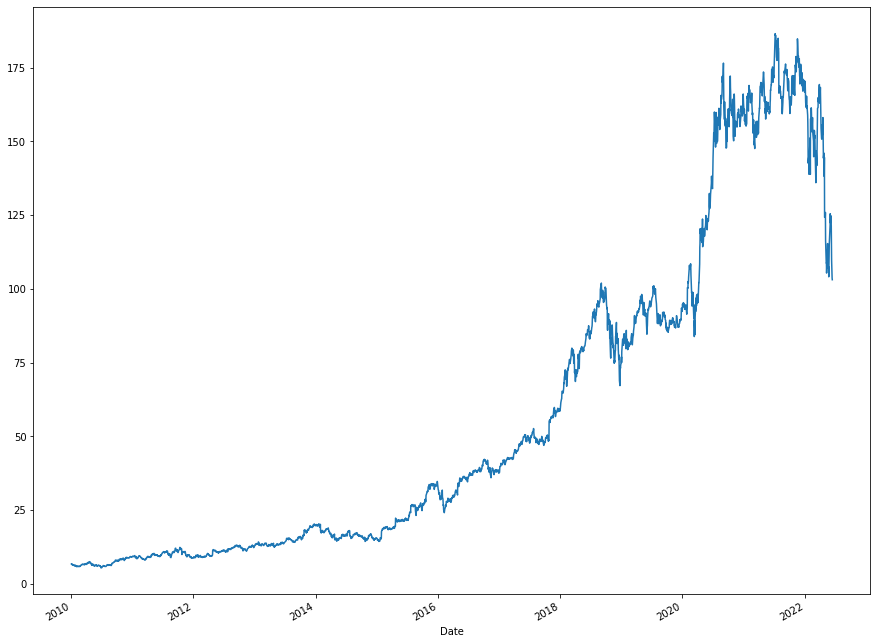

In [9]:
AMZN['Adj Close'].plot(figsize = (15,12))
plt.show()

### 01. Plot Daily Simple Rate of Returns

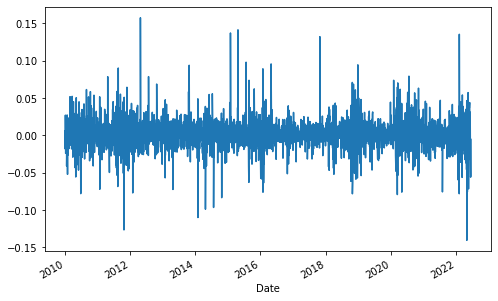

In [10]:
AMZN['simple_return'].plot(figsize=(8,5))
plt.show()

### 02. Average Daily Simple Rate of Return

In [11]:
avg_return_d = AMZN['simple_return'].mean()
print("Average Daily Simple Rate of Return: " + str(round(avg_return_d * 100,5)) + "%")


Average Daily Simple Rate of Return: 0.10792%


### 03. Average Annual Simple Rate of Return

In [12]:
avg_return_a = AMZN['simple_return'].mean() * 250
print("Average Annaul Simple Rate of Return: " + str(round(avg_return_a * 100,5)) + "%")

Average Annaul Simple Rate of Return: 26.97926%


## Daily Logarithmic Rate of Returns / Daily Log Returns

$Log\;Return = ln(\frac{P_t}{P_0})$

They are a better choice when we have only one security and we want to calculate the return over multiple time periods

In [13]:
'''
returns the historical price data of a company, including the percentage daily 
change, daily log return
'''
def log_return(ticket,data_source,start_year):
  info = wb.DataReader(ticket,data_source,start = start_year)
  info['log_return'] = np.log((info['Adj Close'] / info['Adj Close'].shift(1)))
  return info

In [14]:
AMZN_ = log_return('AMZN','yahoo','2010')

In [15]:
AMZN_.describe()

,High,Low,Open,Close,Volume,Adj Close,log_return
count,3134.000000,3134.000000,3134.000000,3134.000000,3.134000e+03,3134.000000,3133.000000
mean,57.205789,55.890815,56.587449,56.557587,8.914266e+07,56.557587,0.000873
std,54.605184,53.285811,53.989015,53.932294,5.377967e+07,53.932294,0.020291
min,5.564500,5.290000,5.296500,5.430500,1.616809e+07,5.430500,-0.151398
25%,13.188875,12.896250,13.066250,13.044625,5.633450e+07,13.044625,-0.008752
50%,33.469250,32.849501,33.178251,33.148500,7.530100e+07,33.148500,0.000974
75%,90.921999,89.212627,90.050375,90.037750,1.050725e+08,90.037750,0.011407
max,188.654007,184.839493,187.199997,186.570496,8.484220e+08,186.570496,0.146225


### 01. Plot Daily Log Rate of Returns

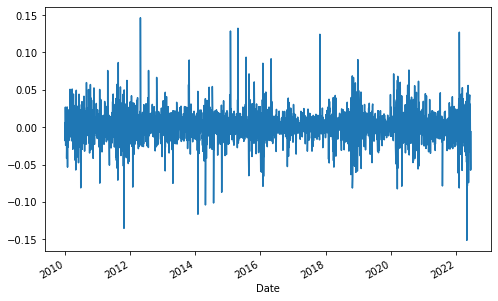

In [16]:
AMZN_['log_return'].plot(figsize=(8,5))
plt.show()

### 02. Average Daily Log Rate of Returns

In [17]:
avg_log_return_d = AMZN_.log_return.mean()
print("Average Daily Log Return: " + str(round(avg_log_return_d * 100,5)) + "%")


Average Daily Log Return: 0.08725%


### 03. Average Annual Log Rate of Return

In [18]:
avg_log_return_a = AMZN_.log_return.mean()*250
print("Average Annual Log Return: " + str(round(avg_log_return_a * 100,5)) + "%")

Average Annual Log Return: 21.81374%


In [19]:
(1 + avg_log_return_d)**250

1.243639666412183